# Topics in Artificial Intelligence
# Assignment 1: Intriduction to Deep Learning


In Section 1 of the notebook, we have implemented a single-layer supervised neural network for you, so no coding is necessary for this section. Sections 2 and 3 are where your coding expertise is needed, and you'll also be expected to answer specific questions. Section 4 is crafted to familiarize you with PyTorch. Beyond that, its primary purpose is to equip you with essential debugging strategies for training neural networks.

# Single-layer neural network
This section provides simple implementation of the single-layer supervised neural network that has 4 inputs and 3 outputs. First, let's review the skeleton of a single linear layer neural network. The inputs of the network are the variables $x_1, x_2, x_3, x_4$, or the input vector $\mathbf{x}=[x_1, x_2, x_3, x_4]$, the outputs of the network are $\widehat{y}_1,\widehat{y}_2,\widehat{y}_3$, or the output vector $\widehat{\mathbf{y}}=[\widehat{y}_1,\widehat{y}_2,\widehat{y}_3]$:

<br>
<center>
<img src="./images/1_layer_net.png" width="450">
</center>
<br>

The given $j$-th output $\widehat{y}_j$ of this single linear layer + activation function is computed as follows:

$$\widehat{y}_j= \text{sigmoid}(w_{1j}x_1 + w_{2j}x_2 + w_{3j}x_3 + w_{4j}x_4 + b_j) = \text{sigmoid}\Big(\sum_{i=1}^{i=4}w_{ij}x_{i} + b_j\Big)$$

In matrix notation, this would be: 

\begin{equation}
\begin{bmatrix}
  \widehat{y}_{1} \\ 
  \widehat{y}_{2} \\
  \widehat{y}_{3} 
\end{bmatrix}^T=\mathbf{Sigmoid}\Bigg(
\begin{bmatrix}
  x_{1} \\
  x_{2} \\
  x_{3} \\
  x_{4}
\end{bmatrix}^T
\begin{bmatrix}
  w_{1,1} & w_{1,2} & w_{1,3}\\
  w_{2,1} & w_{3,2} & w_{2,3}\\
  w_{3,1} & w_{3,2} & w_{3,3}\\
  w_{4,1} & w_{4,2} & w_{4,3}
\end{bmatrix}
+
\begin{bmatrix}
  b_{1} \\
  b_{2} \\
  b_{3}
\end{bmatrix}^T\Bigg)
\end{equation}

or more compactly:

\begin{equation}
\widehat{\mathbf{y}}^T = \mathbf{Sigmoid}(\mathbf{x}^T \cdot \mathbf{W} + \mathbf{b}^T)
\end{equation}

The element-wise sigmoid function is: $\mathbf{Sigmoid}(\mathbf{x}) = 1 \;/\; (1 + exp(-\mathbf{x}))$, or alternatively: $\mathbf{Sigmoid}(\mathbf{x}) = exp(\mathbf{x})\;/\;(1 + exp(\mathbf{x}))$. Here the sigmoid is separated logically into an activation layer $\sigma(x)$ and a linear layer $\text{linear}(3,4)$ as illustrated in figure. 

Training these weights $\mathbf{W}$ and biases $\mathbf{b}$ requires having many training pairs $(\widehat{\mathbf{y}}^{(m)}, \mathbf{x}^{(m)})$. The inputs $\mathbf{x}$ can be the pixels of an image, indices of words, the entries in a database, and the outputs $\widehat{\mathbf{y}}$ can also be literally anything, including a number indicating a category, a set of numbers indicating the indices of words composing a sentence, an output image itself, etc.

## Forward-propagation

Computing the outputs $\widehat{\mathbf{y}}$ from the inputs $\mathbf{x}$ in this network composed of a single linear layer, and a sigmoid layer, is called forward-propagation. Below is the code that implements these two operations:

In [1]:
import numpy as np
import numpy.matlib

class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.001
        self.bias = np.matlib.randn((1, output_dim)) * 0.001
        
    # y = Wx + b
    def forward(self, x):
        return np.dot(x, self.weight) + self.bias
    
    def getParameters(self):
        return [self.weight, self.bias]

# Let's test the composition of the two functions (forward-propagation in the neural network).
x1 = np.array([[1, 2, 2, 3]])
y_hat1 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x1))
print('x[1] = '+ str(x1))
print('y_hat[1] = ' + str(y_hat1) + '\n')

# Let's test the composition of the two functions (forward-propagation in the neural network).
x2 = np.array([[4, 5, 2, 1]])
y_hat2 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x2))
print('x[2] = '+ str(x2))
print('y_hat[2] = ' + str(y_hat2) + '\n')

# We can also compute both at once, which could be more efficient since it requires a single matrix multiplication.
x = np.concatenate((x1, x2), axis = 0)
y_hat = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x))
print('x = ' + str(x))
print('y_hat = ' + str(y_hat))

x[1] = [[1 2 2 3]]
y_hat[1] = [[0.49953686 0.49955883 0.50184709]]

x[2] = [[4 5 2 1]]
y_hat[2] = [[0.49936335 0.49963683 0.50235372]]

x = [[1 2 2 3]
 [4 5 2 1]]
y_hat = [[0.50013643 0.49984491 0.5001429 ]
 [0.49996191 0.50060046 0.49969196]]


## Loss functions.

After computing the output predictions $\widehat{\mathbf{y}}$ it is necessary to compare these against the true values of $\mathbf{y}$. Let's call these true, correct, or desired values $\mathbf{y}$. Typically, a simple loss or cost function is used to measure the degree by which the prediction $\widehat{\mathbf{y}}$ is wrong with respect to $\mathbf{y}$. A common loss function for regression is the sum of squared differences between the prediction and its true value. Assuming a prediction $\widehat{\mathbf{y}}^{(d)}$ for our training sample $\mathbf{x}^{(d)}$ with true value $\mathbf{y}^{(d)}$, then the loss can be computed as:

$$loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)}) = (\widehat{y}^{(d)}_1 - y^{(d)}_1)^2 + (\widehat{y}^{(d)}_2 - y^{(d)}_2)^2 + (\widehat{y}^{(d)}_3 - y^{(d)}_3)^2 = \sum_{j=1}^{j=3}(\widehat{y}^{(d)}_j - y^{(d)}_j)^2$$

The goal is to modify the parameters [$\mathbf{W}, \mathbf{b}$] in the Linear layer so that the value of $loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$ becomes as small as possible for all training samples in a set $D=\{(\mathbf{x}^{(d)},\mathbf{y}^{(d)})\}$. This would in turn ensure that predictions $\widehat{\mathbf{y}}$ are as similar as possible to the true values $\mathbf{y}$. To achieve this we need to minimize the following function:

$$\mathcal{L}(\mathbf{W}, \mathbf{b}) = \sum_{d=1}^{d=|D|} loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$$

The only two variables for our model in the function $\mathcal{L}(\mathbf{W}, \mathbf{b})$ are $\mathbf{W}$ and $\mathbf{b}$, this is because the training dataset $D$ is fixed. Finding the values of $\mathbf{W}$ and $\mathbf{b}$ that minimize the the loss, particularly for complex functions, is typically done using gradient based optimization, like Stochastic Gradient Descent (SGD). 

In [2]:
class nn_MSECriterion:  # MSE = mean squared error.
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))

# Let's test the loss function.
y_hat = np.array([[0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33]])
y_true = np.array([[0.25, 0.25, 0.25], [0.33, 0.33, 0.33], [0.77, 0.77, 0.77], [0.80, 0.80, 0.80]])

nn_MSECriterion().forward(y_hat, y_true)

1.6271000000000002


## Backward-propagation (Backpropagation)

Backpropagation is just applying the chain-rule in calculus to compute the derivative of a function which is the composition of many functions (this is essentially definition of the neural network). 

Below is the implementation of required derivative computations for our simple network. You are highly advised to derive the derivatives implemented here to make sure you understand how one arrives at them. 

In [3]:
# This is referred above as f(u).
class nn_MSECriterion:
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))
        
    def backward(self, predictions, labels):
        num_samples = labels.shape[0]
        return 2 * (predictions - labels)

# This is referred above as g(v).
class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    
    def backward(self, x, gradOutput):
        # It is usually a good idea to use gv from the forward pass and not recompute it again here.
        gv = 1 / (1 + np.exp(-x))  
        return np.multiply(np.multiply(gv, (1 - gv)), gradOutput)

# This is referred above as h(W, b)
class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.01
        self.bias = np.matlib.randn((1, output_dim)) * 0.01
        self.gradWeight = np.zeros_like(self.weight)
        self.gradBias = np.zeros_like(self.bias)
        
    def forward(self, x):
        return np.dot(x, self.weight) + self.bias
    
    def backward(self, x, gradOutput):
        # dL/dw = dh/dw * dL/dv
        self.gradWeight = np.dot(x.T, gradOutput)
        # dL/db = dh/db * dL/dv
        self.gradBias = np.copy(gradOutput)
        # return dL/dx = dh/dx * dL/dv
        return np.dot(gradOutput, self.weight.T)
    
    def getParameters(self):
        params = [self.weight, self.bias]
        gradParams = [self.gradWeight, self.gradBias]
        return params, gradParams
    

# Let's test some dummy inputs for a full pass of forward and backward propagation.
x1 = np.array([[1, 2, 2, 3]])
y1 = np.array([[0.25, 0.25, 0.25]])

# Define the operations.
linear = nn_Linear(4, 3)  # h(W, b)
sigmoid = nn_Sigmoid()  # g(v)
loss = nn_MSECriterion()  # f(u)

# Forward-propagation.
lin = linear.forward(x1)
y_hat = sigmoid.forward(lin)
loss_val = loss.forward(y_hat, y1) # Loss function.

# Backward-propagation.
dy_hat = loss.backward(y_hat, y1)
dlin = sigmoid.backward(lin, dy_hat)
dx1 = linear.backward(x1, dlin)

print('\n num_samples = ' + str(y1.shape[0]))

# Show parameters of the linear layer.
print('\nW = ' + str(linear.weight))
print('B = ' + str(linear.bias))

# Show the intermediate outputs in the forward pass.
print('\nx1    = '+ str(x1))
print('lin   = ' + str(lin))
print('y_hat = ' + str(y_hat))

print('\nloss = ' + str(loss_val))

# Show the intermediate gradients with respect to inputs in the backward pass.
print('\ndy_hat = ' + str(dy_hat))
print('dlin   = ' + str(dlin))
print('dx1    = ' + str(dx1))

# Show the gradients with respect to parameters.
print('\ndW = ' + str(linear.gradWeight))
print('dB = ' + str(linear.gradBias))


 num_samples = 1

W = [[ 0.01867418  0.00253936  0.00502679]
 [ 0.01201566  0.0089925   0.00807159]
 [ 0.00628058  0.00168232 -0.00393144]
 [-0.00984519  0.01067505 -0.00284919]]
B = [[0.01695541 0.00245239 0.01293321]]

x1    = [[1 2 2 3]]
lin   = [[0.0426865  0.05836653 0.01769271]]
y_hat = [[0.51067001 0.51458749 0.50442306]]

loss = 0.20268648794453387

dy_hat = [[0.52134001 0.52917499 0.50884613]]
dlin   = [[0.13027565 0.13218114 0.12720158]]
dx1    = [[ 0.00340786  0.00378071  0.00054049 -0.00023397]]

dW = [[0.13027565 0.13218114 0.12720158]
 [0.2605513  0.26436228 0.25440315]
 [0.2605513  0.26436228 0.25440315]
 [0.39082695 0.39654342 0.38160473]]
dB = [[0.13027565 0.13218114 0.12720158]]


## Gradient checking 

The gradients can also be computed with numerical approximation using the definition of derivatives. Let a single input pair $(\mathbf{x}, \mathbf{y})$ be the input, for each entry $w_{ij}$ in the weight matrix $\mathbf{W}$, the partial derivatives can be computed as follows:

$$\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}} = \frac{\mathcal{L}(\mathbf{W} + \mathbf{E}_{ij},b) - \mathcal{L}(\mathbf{W} - \mathbf{E}_{ij}, b)}{2\epsilon}, $$

where $\mathbf{E}_{ij}$ is a matrix that has $\epsilon$ in its $(i,j)$ entry and zeros everywhere else. Intuitively this gradient tells how would the value of the loss changes if we change a particular weight $w_{ij}$ by an $\epsilon$ amount. We can do the same to compute derivatives with respect to the bias parameters $b_i$. Below is the code that checks for a given input $(\mathbf{x}, \mathbf{y})$, the gradients for the matrix $\mathbf{W}$. 

In [4]:
# We will compute derivatives with respect to a single data pair (x,y)
x = np.array([[2.34, 3.8, 34.44, 5.33]])
y = np.array([[3.2, 4.2, 5.3]])

# Define the operations.
linear = nn_Linear(4, 3)
sigmoid = nn_Sigmoid()
criterion = nn_MSECriterion()

# Forward-propagation.
a0 = linear.forward(x)
a1 = sigmoid.forward(a0)
loss = criterion.forward(a1, y) # Loss function.

# Backward-propagation.
da1 = criterion.backward(a1, y)
da0 = sigmoid.backward(a0, da1)
dx = linear.backward(x, da0)

gradWeight = linear.gradWeight
gradBias = linear.gradBias

approxGradWeight = np.zeros_like(linear.weight)
approxGradBias = np.zeros_like(linear.bias)

# We will verify here that gradWeights are correct and leave it as an excercise
# to verify the gradBias.
epsilon = 0.0001
for i in range(0, linear.weight.shape[0]):
    for j in range(0, linear.weight.shape[1]):
        # Compute f(w)
        fw = criterion.forward(sigmoid.forward(linear.forward(x)), y) # Loss function.
        # Compute f(w + eps)
        shifted_weight = np.copy(linear.weight)
        shifted_weight[i, j] = shifted_weight[i, j] + epsilon
        shifted_linear = nn_Linear(4, 3)
        shifted_linear.bias = linear.bias
        shifted_linear.weight = shifted_weight
        fw_epsilon = criterion.forward(sigmoid.forward(shifted_linear.forward(x)), y) # Loss function
        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight[i, j] = (fw_epsilon - fw) / epsilon

# These two outputs should be similar up to some precision.
print('gradWeight: ' + str(gradWeight))
print('\napproxGradWeight: ' + str(approxGradWeight))

gradWeight: [[ -2.89326962  -4.26565546  -5.58054839]
 [ -4.69847203  -6.92713279  -9.06242901]
 [-42.58299385 -62.78169827 -82.13422503]
 [ -6.59022524  -9.71621521 -12.71124911]]

approxGradWeight: [[ -2.89337315  -4.26572479  -5.5806105 ]
 [ -4.69874504  -6.9273156   -9.06259276]
 [-42.6053914  -62.79666151 -82.14760481]
 [ -6.59076232  -9.7165748  -12.71157119]]


## Stochastic Gradient Descent.

The code below creates a dummy dataset that will be used for training. The inputs are 1000 vectors of size 4, and the outputs are 1000 vectors of size 3. The focus here is on training, however, in a real task one would check accuracy of the model on test (unseen) data.

In [5]:
dataset_size = 1000

# Generate random inputs within some range.
x = np.random.uniform(0, 6, (dataset_size, 4))
# Generate outputs based on the inputs using some function.
y1 = np.sin(x.sum(axis = 1))
y2 = np.sin(x[:, 1] * 6)
y3 = np.sin(x[:, 1] + x[:, 3])
y = np.array([y1, y2, y3]).T

print(x.shape)
print(y.shape)

(1000, 4)
(1000, 3)


To learn the parameters efficiently we will implement the stochastic gradient descent loop that moves the weights according to the gradients. In each iteration we sample an $(\mathbf{x}, \mathbf{y})$ pair and compute the gradients of the parameters, then we update the parameters according to the following gradient descent rules:

$$w_{ij} = w_{ij} - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}}$$

$$b_i = b_i - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial b_i}$$

where $\lambda$ is the learning rate. 

In [6]:
learningRate = 0.1

model = {}
model['linear'] = nn_Linear(4, 3)
model['sigmoid'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

for epoch in range(0, 400):
    loss = 0
    for i in range(0, dataset_size):
        xi = x[i:i+1, :]
        yi = y[i:i+1, :]

        # Forward.
        a0 = model['linear'].forward(xi)
        a1 = model['sigmoid'].forward(a0)
        loss += model['loss'].forward(a1, yi)

        # Backward.
        da1 = model['loss'].backward(a1, yi)
        da0 = model['sigmoid'].backward(a0, da1)
        model['linear'].backward(xi, da0)

        model['linear'].weight = model['linear'].weight - learningRate * model['linear'].gradWeight
        model['linear'].bias = model['linear'].bias - learningRate * model['linear'].gradBias
    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

epoch[0] = 1.51006695


epoch[10] = 1.44024971
epoch[20] = 1.42536606
epoch[30] = 1.41787978
epoch[40] = 1.41397241
epoch[50] = 1.41162821
epoch[60] = 1.41002777
epoch[70] = 1.40887681
epoch[80] = 1.40801709
epoch[90] = 1.40735282
epoch[100] = 1.40682398
epoch[110] = 1.40639174
epoch[120] = 1.40603016
epoch[130] = 1.40572137
epoch[140] = 1.40545284
epoch[150] = 1.40521561
epoch[160] = 1.40500326
epoch[170] = 1.40481115
epoch[180] = 1.40463595
epoch[190] = 1.40447524
epoch[200] = 1.40432725
epoch[210] = 1.40419065
epoch[220] = 1.40406441
epoch[230] = 1.40394770
epoch[240] = 1.40383982
epoch[250] = 1.40374014
epoch[260] = 1.40364809
epoch[270] = 1.40356310
epoch[280] = 1.40348464
epoch[290] = 1.40341220
epoch[300] = 1.40334529
epoch[310] = 1.40328344
epoch[320] = 1.40322621
epoch[330] = 1.40317320
epoch[340] = 1.40312403
epoch[350] = 1.40307835
epoch[360] = 1.40303585
epoch[370] = 1.40299624
epoch[380] = 1.40295928
epoch[390] = 1.40292473


# Two-layer neural network with 1-hidden layer.
In the previous section, we constructed a single-layer neural network that accepted input vectors of size 4 and produced output vectors of size 3. In this section, your challenge is to adapt the code to train a two-layer network, which includes one hidden layer with a size determined by hidden_state_size. Please note that hidden_state_size is a variable parameter that you should be able to adjust.

<br>
<center>
<img src="images/2_layer_net.png" width="450">
</center>
<br>


## Implementing the network and SGD learning.
Please modify the code of Section "Stochastic Gradient Descent" to implement a two-layer network and the SGD training procedure for it. 


In [7]:
hidden_state_size = 5;

# Your code goes here.
learningRate = 0.1

model = {}
model['linear1'] = nn_Linear(4, hidden_state_size)  # 1st linear layer
model['sigmoid1'] = nn_Sigmoid()    # 1st Sigmoid activation layer
model['linear2'] = nn_Linear(hidden_state_size, 3)  # 2nd linear layer
model['sigmoid2'] = nn_Sigmoid()    # 2nd Sigmoid activation layer
model['loss'] = nn_MSECriterion()

for epoch in range(0, 400):
    loss = 0
    for i in range(0, dataset_size):
        xi = x[i:i+1, :]
        yi = y[i:i+1, :]

        # Forward.
        a0 = model['linear1'].forward(xi) # 1st linear layer
        a1 = model['sigmoid1'].forward(a0)  # 1st Sigmoid activation layer
        a2 = model['linear2'].forward(a1)   # 2nd linear layer
        a3 = model['sigmoid2'].forward(a2)  # 2nd Sigmoid activation layer
        loss += model['loss'].forward(a3, yi)

        # Backward.
        da3 = model['loss'].backward(a3, yi)
        da2 = model['sigmoid2'].backward(a2, da3)  # 2nd Sigmoid activation layer
        da1 = model['linear2'].backward(a1, da2)   # 2nd linear layer
        da0 = model['sigmoid1'].backward(a0, da1)  # 1st Sigmoid activation layer
        model['linear1'].backward(xi, da0) # 1st linear layer

        # update parameters of the 1st model
        model['linear1'].weight = model['linear1'].weight - learningRate * model['linear1'].gradWeight
        model['linear1'].bias = model['linear1'].bias - learningRate * model['linear1'].gradBias

        # update parameters of the 2nd model
        model['linear2'].weight = model['linear2'].weight - learningRate * model['linear2'].gradWeight
        model['linear2'].bias = model['linear2'].bias - learningRate * model['linear2'].gradBias
        
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

epoch[0] = 1.53365924
epoch[10] = 1.50935985
epoch[20] = 1.47434482
epoch[30] = 1.45716346
epoch[40] = 1.44676234
epoch[50] = 1.44497618
epoch[60] = 1.44351676
epoch[70] = 1.43389766
epoch[80] = 1.41420527
epoch[90] = 1.40731052
epoch[100] = 1.40455947
epoch[110] = 1.40318398
epoch[120] = 1.40231005
epoch[130] = 1.40171130
epoch[140] = 1.40127907
epoch[150] = 1.40094581
epoch[160] = 1.40067213
epoch[170] = 1.40043727
epoch[180] = 1.40022992
epoch[190] = 1.40004149
epoch[200] = 1.39986664
epoch[210] = 1.39970526
epoch[220] = 1.39955963
epoch[230] = 1.39942982
epoch[240] = 1.39931200
epoch[250] = 1.39920109
epoch[260] = 1.39909481
epoch[270] = 1.39899337
epoch[280] = 1.39889708
epoch[290] = 1.39880541
epoch[300] = 1.39871708
epoch[310] = 1.39863074
epoch[320] = 1.39854580
epoch[330] = 1.39846287
epoch[340] = 1.39838270
epoch[350] = 1.39830513
epoch[360] = 1.39822951
epoch[370] = 1.39815545
epoch[380] = 1.39808281
epoch[390] = 1.39801159


## Gradient checking.
Check the gradients of the above network for both linear layer parameters $W_1$ and $W_2$ using some sample input pair ($\mathbf{x}$, $\mathbf{y}$). You will likely want to look and model this after Section "Gradient checking" above.

In [8]:
# Your code goes here.
epsilon = 1e-5

# initialize the matrices for storing the numerical gradients
numerical_grad_W1 = np.zeros_like(model['linear1'].weight)
numerical_grad_W2 = np.zeros_like(model['linear2'].weight)

# calculate the numerical gradients of W1
for i in range(model['linear1'].weight.shape[0]):
    for j in range(model['linear1'].weight.shape[1]):
        model['linear1'].weight[i, j] += epsilon
        shifted_loss = model['loss'].forward(model['sigmoid2'].forward(model['linear2'].forward(model['sigmoid1'].forward(model['linear1'].forward(xi)))), yi)
        
        model['linear1'].weight[i, j] -= epsilon # Reset to original value
        loss = model['loss'].forward(model['sigmoid2'].forward(model['linear2'].forward(model['sigmoid1'].forward(model['linear1'].forward(xi)))), yi)
        
        numerical_grad_W1[i, j] = (shifted_loss - loss) / epsilon

# calculate the numerical gradients of W2
for i in range(model['linear2'].weight.shape[0]):
    for j in range(model['linear2'].weight.shape[1]):
        model['linear2'].weight[i, j] += epsilon
        shifted_loss = model['loss'].forward(model['sigmoid2'].forward(model['linear2'].forward(model['sigmoid1'].forward(model['linear1'].forward(xi)))), yi)
        
        model['linear2'].weight[i, j] -= epsilon # Reset to original value
        loss = model['loss'].forward(model['sigmoid2'].forward(model['linear2'].forward(model['sigmoid1'].forward(model['linear1'].forward(xi)))), yi)
        
        numerical_grad_W2[i, j] = (shifted_loss - loss) / epsilon

# compare the analytical gradients with the numerical gradients
print("Analytical grad W1:", model['linear1'].gradWeight)
print("Numerical grad W1:", numerical_grad_W1)

print("Analytical grad W2:", model['linear2'].gradWeight)
print("Numerical grad W2:", numerical_grad_W2)


Analytical grad W1: [[-3.77937339e-07  3.79109553e-08 -4.80983521e-08 -4.71240389e-09
  -7.86123699e-19]
 [-5.69692125e-07  5.71459087e-08 -7.25021044e-08 -7.10334521e-09
  -1.18498077e-18]
 [-2.72117616e-07  2.72961618e-08 -3.46311611e-08 -3.39296486e-09
  -5.66014746e-19]
 [-1.11343546e-06  1.11688890e-07 -1.41701825e-07 -1.38831415e-08
  -2.31598709e-18]]
Numerical grad W1: [[-3.77875509e-07  3.79252185e-08 -4.80504525e-08 -4.66293670e-09
   0.00000000e+00]
 [-5.69633229e-07  5.71986902e-08 -7.24753590e-08 -7.06101844e-09
   0.00000000e+00]
 [-2.72049050e-07  2.73558953e-08 -3.45501405e-08 -3.37507799e-09
   0.00000000e+00]
 [-1.11337606e-06  1.11732845e-07 -1.41664458e-07 -1.38555833e-08
   0.00000000e+00]]
Analytical grad W2: [[ 5.06120771e-09  8.32579701e-08 -1.62881785e-09]
 [ 5.15637420e-06  8.48234796e-05 -1.65944470e-06]
 [ 5.15585397e-06  8.48149218e-05 -1.65927728e-06]
 [ 5.15693466e-06  8.48326994e-05 -1.65962507e-06]
 [ 5.15785535e-06  8.48478449e-05 -1.65992137e-06]]
Num

## Activation functions.

As was covered in class, there are other activation functions that can be used instead of sigmoid. Implement below the forward and backward operation for two popular activation functions.

$$\text{ReLU}(\mathbf{x}) = \text{max}(0, \mathbf{x})$$

$$\text{Tanh($\mathbf{x}$)} = \text{tanh}(\mathbf{x}) = \frac{e^{\mathbf{x}} - e^{-\mathbf{x}}}{e^{\mathbf{x}} + e^{-\mathbf{x}}}$$

Note, that in the above activations are applied element-wise on the input vector $\mathbf{x}$.

In [9]:
# Rectified linear unit
class nn_ReLU:
    def forward(self, x):
        # Forward pass.
        return np.maximum(0, x)
    
    def backward(self, x, gradOutput):
        # Backward pass
        return np.multiply(np.where(x > 0, 1, 0), gradOutput)   
        
        
# Hyperbolic tangent.
class nn_Tanh:
    def forward(self, x):
        # Forward pass.
        return np.tanh(x)
    
    def backward(self, x, gradOutput):
        # Backward pass
        return np.multiply((1 - np.square(np.tanh(x))), gradOutput)


## Loss functions.

As discussed in class, there are other loss functions that can be used instead of a mean squared error. Implement the forward and backward operations for the following very common loss function where $\widehat{\mathbf{y}}$ is a vector of predicted values, and $\mathbf{y}$ is the vector with ground-truth labels. Assume both vectors are of size $n$. 

$\text{BinaryCrossEntropy}(\mathbf{y}, \widehat{\mathbf{y}}) = - \frac{1}{n}\sum_{i=1}^{i=n} [y_i\text{log}(\widehat{y}_i) + (1 - y_i)\text{log}(1 - \widehat{y}_i)]$,

The binary cross entropy loss assumes that the vector $\mathbf{y}$ only has values that are either 0 and 1, and the prediction vector $\widehat{\mathbf{y}}$ contains values between 0 and 1 (e.g. the output of a $\text{sigmoid}$ layer).

In [10]:
# Binary cross entropy criterion. Useful for classification as opposed to regression.
class nn_BCECriterion:
    def forward(self, predictions, labels):
        # Forward pass.
        n = labels.shape[0]
        return -(1 / n) * np.sum(np.multiply(labels, np.log(predictions)) + np.multiply((1 - labels), np.log(1 - predictions)))
        
    def backward(self, predictions, labels):
        # Backward pass.
        n = labels.shape[0]
        return (1 / n) * (predictions - labels) / (np.multiply(predictions, (1 - predictions)))

<b>Optional</b>: Most deep learning libraries support batches, meaning you can forward, and backward a set of inputs. So far the code supports batches in the forward pass. However, the backward pass does not support batches. Modify the code in backward function of the nn_Linear class to support batches. Then test the implementation by training the network in Section 2.1 using a batch size of 32. <span style="color:#666">(Keep in mind that the gradWeight and gradBias vectors should accumulate the gradients of each sample in the batch. This is because the gradient of the loss with respect to the batch is the sum of the gradients with respect to each sample in the batch. This means that for a batch of size 32, the sum will be over the 32 samples).</span>

# Behaviour of neural networks.

Prior to this section, all experiments were done in a dummy dataset where it is difficult to see how neural networks behave on more realistic data. In this section the goal is to get a feel for how newural networks behave and what effect hidden statest may play. Below is the code that generates and visualizes a classification dataset of 400 samples. 

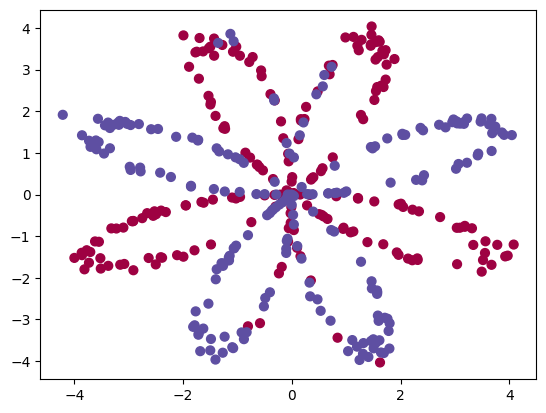

In [34]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.datasets

def load_planar_dataset():
    np.random.seed(1)
    m = 400                # number of examples
    N = int(m/2)           # number of points per class
    D = 2                  # dimensionality
    X = np.zeros((m,D))    # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4                  # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2                    # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

# Load the data
X, Y = load_planar_dataset();

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

## Two-layer neural network with 1-hidden layer of size = 1.

Reimplement the network from Section "Implementing the network and SGD learning" here, train it and then display the results. 

epoch[0] = 0.09728146
epoch[10] = 0.09935662
epoch[20] = 0.09936244
epoch[30] = 0.09934754
epoch[40] = 0.09926602
epoch[50] = 0.09892327
epoch[60] = 0.09817315
epoch[70] = 0.09724175
epoch[80] = 0.09589014
epoch[90] = 0.09443383
epoch[100] = 0.09332809
epoch[110] = 0.09259587
epoch[120] = 0.09211205
epoch[130] = 0.09177365
epoch[140] = 0.09152052
epoch[150] = 0.09132029
epoch[160] = 0.09115538
epoch[170] = 0.09101571
epoch[180] = 0.09089506
epoch[190] = 0.09078929
epoch[200] = 0.09069550
epoch[210] = 0.09061153
epoch[220] = 0.09053575
epoch[230] = 0.09046687
epoch[240] = 0.09040387
epoch[250] = 0.09034592
epoch[260] = 0.09029236
epoch[270] = 0.09024262
epoch[280] = 0.09019624
epoch[290] = 0.09015284


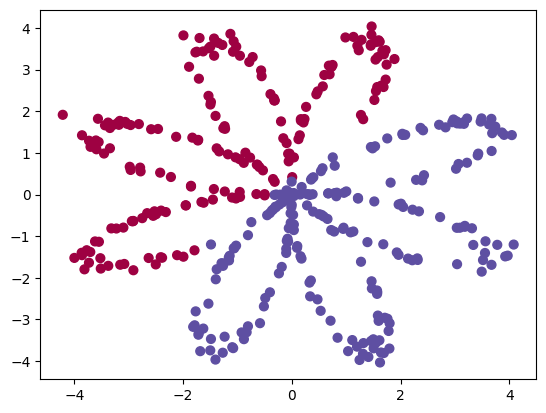

In [12]:
# Build a two-layer neural network (so one hidden layer) with sigmoid activations 
# and MSE loss. The hidden_state_dimensionality should be set to 1 using the variable
# below.
hidden_state_size = 1; 

# Define the 2-layer network here (fill in your code)
model = {}
model['linear1'] = nn_Linear(2, hidden_state_size)  # 1st linear layer
model['sigmoid1'] = nn_Sigmoid()    # 1st Sigmoid activation layer
model['linear2'] = nn_Linear(hidden_state_size, 1)  # 2nd linear layer
model['sigmoid2'] = nn_Sigmoid()    # 2nd Sigmoid activation layer
model['loss'] = nn_MSECriterion()

# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.01
numberEpochs = 300

X, Y = load_planar_dataset()
X = X.T
Y = Y.T

for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size):        
        # Forward pass (fill in your code)
        a0 = model['linear1'].forward(X[i:i+1, :])
        a1 = model['sigmoid1'].forward(a0)
        a2 = model['linear2'].forward(a1)
        a3 = model['sigmoid2'].forward(a2)
        loss += model['loss'].forward(a3, Y[i:i+1, :])
        
        # Backward pass (fill in your code)
        da3 = model['loss'].backward(a3, Y[i:i+1, :])
        da2 = model['sigmoid2'].backward(a2, da3)
        da1 = model['linear2'].backward(a1, da2)
        da0 = model['sigmoid1'].backward(a0, da1)
        model['linear1'].backward(X[i:i+1, :], da0)
        
        # Update gradients (fill in your code)
        model['linear1'].weight = model['linear1'].weight - learningRate * model['linear1'].gradWeight
        model['linear1'].bias = model['linear1'].bias - learningRate * model['linear1'].gradBias
        
        model['linear2'].weight = model['linear2'].weight - learningRate * model['linear2'].gradWeight
        model['linear2'].bias = model['linear2'].bias - learningRate * model['linear2'].gradBias

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))


%matplotlib inline

classEstimate = np.zeros((400,1), dtype='uint8')

for i in range(0, 400):        
    # Forward pass (fill in your code)
    a0 = model['linear1'].forward(X[i:i+1, :])
    a1 = model['sigmoid1'].forward(a0)
    a2 = model['linear2'].forward(a1)
    a3 = model['sigmoid2'].forward(a2)
        
    classEstimate[i,0] = (a3 > 0.5)
X = X.T
Y = Y.T
plt.scatter(X[0, :], X[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## Two-layer neural network with 1-hidden layer of size = 5.

Redo the experiment with the hidden layer of size 5 and visualize the result. <b>Describe in a separate cell of the notebook what is different between the two runs </b>. What behavior did network with larger hidden state exhibit that the one with smaller one did not? Why? 

epoch[0] = 0.09246627
epoch[10] = 0.09782833
epoch[20] = 0.09772996
epoch[30] = 0.09721626
epoch[40] = 0.09595156
epoch[50] = 0.09497686
epoch[60] = 0.09457963
epoch[70] = 0.09416189
epoch[80] = 0.09323859
epoch[90] = 0.09157164
epoch[100] = 0.08959887
epoch[110] = 0.08794847
epoch[120] = 0.08679538
epoch[130] = 0.08598643
epoch[140] = 0.08527916
epoch[150] = 0.08428160
epoch[160] = 0.08199275
epoch[170] = 0.07651980
epoch[180] = 0.06910749
epoch[190] = 0.06293673
epoch[200] = 0.05847177
epoch[210] = 0.05527966
epoch[220] = 0.05294950
epoch[230] = 0.05120202
epoch[240] = 0.04985564
epoch[250] = 0.04879175
epoch[260] = 0.04793152
epoch[270] = 0.04722145
epoch[280] = 0.04662450
epoch[290] = 0.04611443


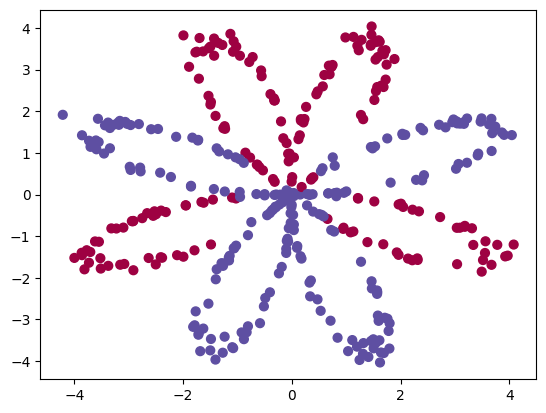

In [13]:
hidden_state_size = 5; 

# Rest should be taken from above 
# Define the 2-layer network here (fill in your code)
model = {}
model['linear1'] = nn_Linear(2, hidden_state_size)  # 1st linear layer
model['sigmoid1'] = nn_Sigmoid()    # 1st Sigmoid activation layer
model['linear2'] = nn_Linear(hidden_state_size, 1)  # 2nd linear layer
model['sigmoid2'] = nn_Sigmoid()    # 2nd Sigmoid activation layer
model['loss'] = nn_MSECriterion()

# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.01
numberEpochs = 300

X, Y = load_planar_dataset()
X = X.T
Y = Y.T

for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size):        
        # Forward pass (fill in your code)
        a0 = model['linear1'].forward(X[i:i+1, :])
        a1 = model['sigmoid1'].forward(a0)
        a2 = model['linear2'].forward(a1)
        a3 = model['sigmoid2'].forward(a2)
        loss += model['loss'].forward(a3, Y[i:i+1, :])
        
        # Backward pass (fill in your code)
        da3 = model['loss'].backward(a3, Y[i:i+1, :])
        da2 = model['sigmoid2'].backward(a2, da3)
        da1 = model['linear2'].backward(a1, da2)
        da0 = model['sigmoid1'].backward(a0, da1)
        model['linear1'].backward(X[i:i+1, :], da0)
        
        # Update gradients (fill in your code)
        model['linear1'].weight = model['linear1'].weight - learningRate * model['linear1'].gradWeight
        model['linear1'].bias = model['linear1'].bias - learningRate * model['linear1'].gradBias
        
        model['linear2'].weight = model['linear2'].weight - learningRate * model['linear2'].gradWeight
        model['linear2'].bias = model['linear2'].bias - learningRate * model['linear2'].gradBias

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))


%matplotlib inline

classEstimate = np.zeros((400,1), dtype='uint8')

for i in range(0, 400):        
    # Forward pass (fill in your code)
    a0 = model['linear1'].forward(X[i:i+1, :])
    a1 = model['sigmoid1'].forward(a0)
    a2 = model['linear2'].forward(a1)
    a3 = model['sigmoid2'].forward(a2)
        
    classEstimate[i,0] = (a3 > 0.5)
X = X.T
Y = Y.T
plt.scatter(X[0, :], X[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

1. Network with larger hidden state has higher accuracy.
2. Network with larger hidden state need more time to train and has lower convergence speed.

# PyTorch and Debugging.

In this section the goal is to experiment with PyTorch and also with the typical debugging techniques used in deep learning and simple debugging tools available to you. In this part, you are given a re-implementation of the dataset and neural network you worked with in the previous section of the assignment. However, this re-implementation is based on the data structures and functions available in PyTorch. Note that both the data loader and the model code contain a few strategically placed **bugs**. Your goal in this part of the assignment is to use the provided strategies to discover those bugs. 

## Dataloader 

First thing that typically happens in PyTorch code is definition of a dataloader. A dataloader is used to load and organize the data for training, validation and testing. We are providing a slightly buggy implementation below. 

In [66]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.utils.data as data
import torch.nn as nn
import random

class PlanarDataset(data.Dataset):
    def __init__(self,num_examples=400):
        ## Function to initialize the dataset class
        np.random.seed(1)
        m = 400                  # number of examples
        N = int(m/2)             # number of points per class
        D = 2                    # dimensionality
        a = 4                    # maximum ray of the flower

        self.X = np.zeros((m,D)) # data matrix where each row is a single example
        self.Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)

        for j in range(2):
            ix = range(N*j,N*(j+1))
            t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
            r = a*np.sin(4*t) + np.random.randn(N)*0.2                    # radius
            self.X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
            self.Y[ix] = j #random.randint(0, 1) 

    def __getitem__(self, index):
        ## Return a data point given an index. Convert numpy array to Pytorch Tensor.
        return torch.from_numpy(self.X[index,:],).type(torch.FloatTensor), torch.from_numpy(self.Y[index,:]).type(torch.FloatTensor)


    def __len__(self):
        ## Return the length of the dataset
        return self.X.shape[0]
    
    def get_all_data(self):
        ## Return all the data. Not something you would do for large datasets. Just used here for convenience of visualization
        return self.X.T, self.Y.T


## **Debugging Strategy 1**: Always visualize the data.

Please use the code below to visualize the data from the dataloader above. Please run this cell multiple times. You should see that the visualization changes. This means that something non-determenistic is happening in the datalader. You should be able spot what is happening from visualization. Once you do, go back and fix the data loader above. 

**Hint:** only one line needs changing in the dataloader. 

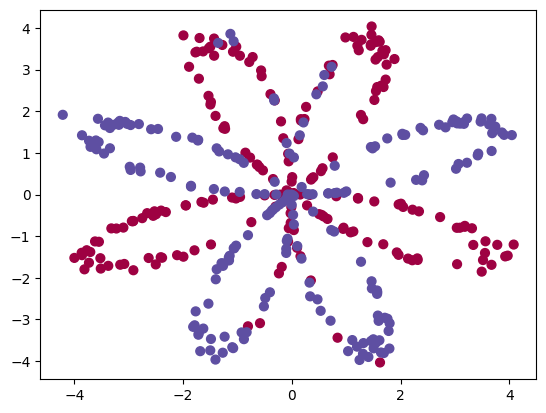

In [69]:
# Load the data
planarDataObj = PlanarDataset()
X, Y = planarDataObj.get_all_data()

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

## Model definition and optimization

Functions bellow define a version of neural network with a single hidden layer, from Section "Behaviour of neural networks", using PyTorch functions. Note that similarly to above this code is not bug-free.

epoch[0] = 0.00463040
epoch[10] = 0.00411374
epoch[20] = 0.00410153
epoch[30] = 0.00387393
epoch[40] = 0.00377025
epoch[50] = 0.00384547
epoch[60] = 0.00376003
epoch[70] = 0.00380792
epoch[80] = 0.00367179
epoch[90] = 0.00368762
epoch[100] = 0.00356772
epoch[110] = 0.00364725
epoch[120] = 0.00363151
epoch[130] = 0.00360419
epoch[140] = 0.00301182
epoch[150] = 0.00246518
epoch[160] = 0.00225911
epoch[170] = 0.00211017
epoch[180] = 0.00229848
epoch[190] = 0.00196710
epoch[200] = 0.00196505
epoch[210] = 0.00193945
epoch[220] = 0.00198311
epoch[230] = 0.00204906
epoch[240] = 0.00190241
epoch[250] = 0.00191529
epoch[260] = 0.00181826
epoch[270] = 0.00199014
epoch[280] = 0.00179769
epoch[290] = 0.00175605


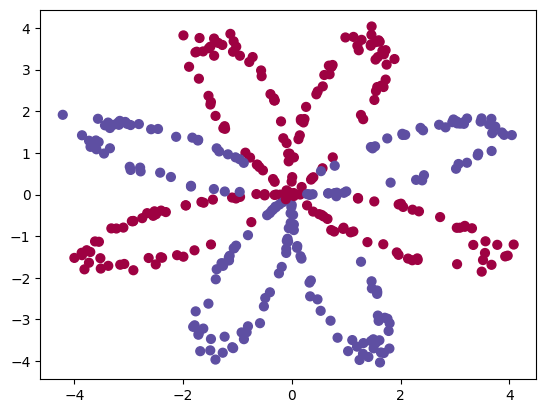

In [70]:
hidden_state_size = 5; 

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
#for param in linear1.parameters():  
#    param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
#planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## **Debugging Strategy 2:** Remove all sources of randomness from the code

Note that while it is clear that the code above isn't performing as expected (loss does not go down) with every run of the cell you should see a slightly different result and order of loss values. This is because of inherent randomness in the code. While the randomness is good when learning (avoids biases) it is bad when debugging for obvious reasons. Modify the code above to make sure it executes the same way every time you run it. For this you will want to make use of the function below and also fix the randomness in dataloader. 

**Note:** Use the function below as well as look at ensuring that the order of data in the dataloader remains fixed. You may want to consult PyTorch guidelines on reproducibility https://pytorch.org/docs/stable/notes/randomness.html.

epoch[0] = 0.00445044
epoch[10] = 0.00425069
epoch[20] = 0.00410612
epoch[30] = 0.00395750
epoch[40] = 0.00380322
epoch[50] = 0.00381829
epoch[60] = 0.00362503
epoch[70] = 0.00318312
epoch[80] = 0.00284260
epoch[90] = 0.00262447
epoch[100] = 0.00233605
epoch[110] = 0.00219482
epoch[120] = 0.00210903
epoch[130] = 0.00198819
epoch[140] = 0.00195605
epoch[150] = 0.00207218
epoch[160] = 0.00193985
epoch[170] = 0.00202940
epoch[180] = 0.00194622
epoch[190] = 0.00190108
epoch[200] = 0.00176547
epoch[210] = 0.00188485
epoch[220] = 0.00177002
epoch[230] = 0.00193592
epoch[240] = 0.00176917
epoch[250] = 0.00174822
epoch[260] = 0.00184171
epoch[270] = 0.00172306
epoch[280] = 0.00195291
epoch[290] = 0.00173516


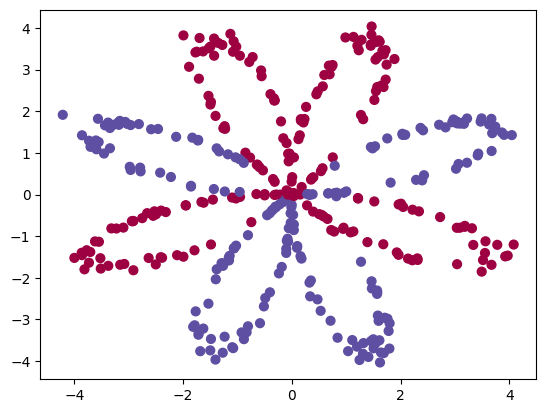

In [71]:
def fix_seeds():
    random_seed = 1      # or coluld be any of your favorite number 
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)

fix_seeds()

# Copy the code from Section Model definition and optimization and modify accordingly
hidden_state_size = 5; 

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
#for param in linear1.parameters():  
#    param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
#planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## **Debugging Strategy 3:** Train with minimal amount of data 

It may still be difficult to identify what is wrong based on results in Section "Remove all sources of randomness from the code". A really good strategy, especially for model debugging, is to try optimizing with a single example/sample. Modify the code from Section "Remove all sources of randomness from the code" in order to do this. Once you do and run it, it should be obvious that there is a bug in your code and what that bug might be. 

epoch[0] = 0.00403461
epoch[10] = 0.00002189
epoch[20] = 0.00001128
epoch[30] = 0.00000754
epoch[40] = 0.00000565
epoch[50] = 0.00000451
epoch[60] = 0.00000374
epoch[70] = 0.00000320
epoch[80] = 0.00000279
epoch[90] = 0.00000247
epoch[100] = 0.00000222
epoch[110] = 0.00000201
epoch[120] = 0.00000184
epoch[130] = 0.00000169
epoch[140] = 0.00000157
epoch[150] = 0.00000146
epoch[160] = 0.00000136
epoch[170] = 0.00000128
epoch[180] = 0.00000121
epoch[190] = 0.00000114
epoch[200] = 0.00000108
epoch[210] = 0.00000103
epoch[220] = 0.00000098
epoch[230] = 0.00000094
epoch[240] = 0.00000090
epoch[250] = 0.00000086
epoch[260] = 0.00000083
epoch[270] = 0.00000079
epoch[280] = 0.00000076
epoch[290] = 0.00000074


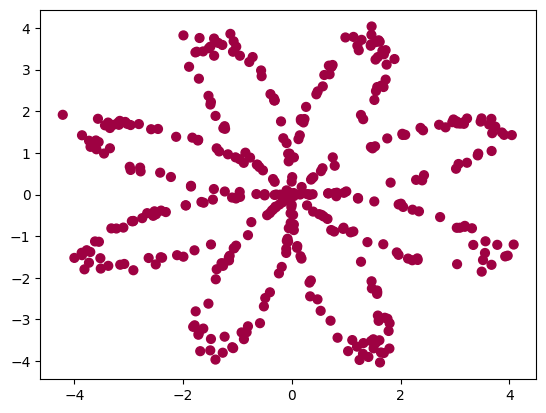

In [18]:
# Copy the code from Section "Remove all sources of randomness from the code" and modify to run with batch size of 1 and only one / same batch used in each epoch.
def fix_seeds():
    random_seed = 1      # or coluld be any of your favorite number 
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)

fix_seeds()

# Copy the code from Section Model definition and optimization and modify accordingly
hidden_state_size = 5; 

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
#for param in linear1.parameters():  
#    param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 1

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
#planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

epoch[0] = 0.00328367
epoch[10] = 0.00000497
epoch[20] = 0.00000412
epoch[30] = 0.00000361
epoch[40] = 0.00000318
epoch[50] = 0.00000283
epoch[60] = 0.00000252
epoch[70] = 0.00000231
epoch[80] = 0.00000208
epoch[90] = 0.00000196
epoch[100] = 0.00000181
epoch[110] = 0.00000168
epoch[120] = 0.00000159
epoch[130] = 0.00000151
epoch[140] = 0.00000137
epoch[150] = 0.00000131
epoch[160] = 0.00000126
epoch[170] = 0.00000119
epoch[180] = 0.00000115
epoch[190] = 0.00000111
epoch[200] = 0.00000105
epoch[210] = 0.00000101
epoch[220] = 0.00000096
epoch[230] = 0.00000092
epoch[240] = 0.00000089
epoch[250] = 0.00000085
epoch[260] = 0.00000084
epoch[270] = 0.00000080
epoch[280] = 0.00000079
epoch[290] = 0.00000075


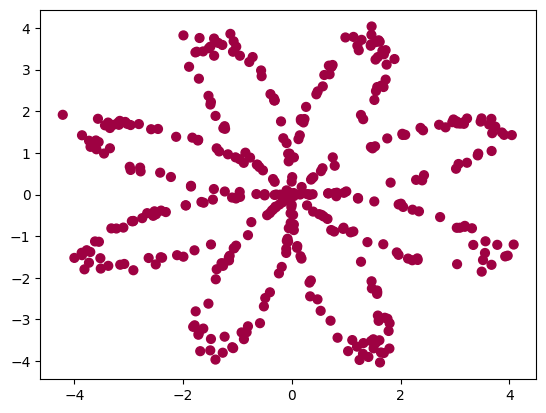

In [19]:
# Once you find the bug, fix it here and make sure you can effectively reproduce the result in Section "Behaviour of neural networks"
def fix_seeds():
    random_seed = 1      # or coluld be any of your favorite number 
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)

fix_seeds()

# Copy the code from Section Model definition and optimization and modify accordingly
hidden_state_size = 5; 

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
#for param in linear1.parameters():  
#    param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## **Debugging Strategy 4:** Use Tensorboard or similar.

At this point the model and training code should be correct and you should be able to train the model. However, the hyperparameters may still not be optimal. For hyperparameter tuning and to log many experiments it is advisable to use some way to visualise the training process. Tensorboard provides such ability. Another alternative is Weights & Biases.  

Let’s now try using TensorBoard with PyTorch! Before logging anything, we need to create a SummaryWriter instance. Writer will output to ./runs/ directory by default.

In [20]:
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

ModuleNotFoundError: No module named 'tensorboard'

We can use `add_scalar(tag, scalar_value, global_step=None, walltime=None)` to log scalar values (e.g. loss). We have to call `flush()` method to make sure that all pending events have been written to disk. Finally if we do not need the summary writer anymore, then call `close()` method.

Your next task is to slightly modify the code to log the Loss and Accuracy into the Tesnorboard log file. This will require modifying the training loop as follows:

```
for epoch in range(num_epochs):
    running_loss = 0.0
    total_correct = 0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data

        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 

        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        total_correct += output.argmax(dim=1).eq(target).sum().item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()
    
    # Log accuracy and loss
    writer.add_scalar("Loss/train", running_loss, epoch)
    writer.add_scalar("Accuracy", total_correct/ dataset_size, epoch)
        
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))

# Flush and close the log file
writer.flush()
writer.close()
```




In [ ]:
# Insert your code here

Now install the tensorboard

In [ ]:
!pip install tensorboard

Now to start tensorboard in google colab we can run following command.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs